# Recurrent Neural Network (RNN) com 9 atributos

## Utilização dos atributos Acelerômetro, Som, Orientação, Aceleração Linear, Giroscópio, Vetor de Rotação, Vetor de Rotação para Jogos, Giroscópio descalibrado e Velocidade.

### Instalação de recursos no notebook

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install pydot

    100% |████████████████████████████████| 1.3MB 20.8MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1
    100% |████████████████████████████████| 317kB 21.5MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 31.4MB/s ta 0:00:01
    100% |████████████████████████████████| 83.1MB 616kB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 20.0MB/s ta 0:00:01
    100% |████████████████████████████████| 10.1MB 5.7MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 40.8MB/s a 0:00:01
    100% |████████████████████████████████| 1.1MB 27.4MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 38.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /home/ec2-user/.

### Importação de bibliotecas e carregamento do arquivo (Janela de 5 segundos)

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('dataset_5secondWindow[3].csv')

### Divisão da base de dados em dados de treino e teste

In [3]:
from sklearn.cross_validation import train_test_split
df, test = train_test_split(data, test_size = 0.2, random_state = 0)

df.T

print(df.target.unique())
print("----------------------------------------")
print(df.target.value_counts())

['Car' 'Walking' 'Train' 'Bus' 'Still']
----------------------------------------
Walking    954
Bus        950
Car        941
Still      936
Train      933
Name: target, dtype: int64


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Verificação das quantidades de dados para cada um dos rótulos

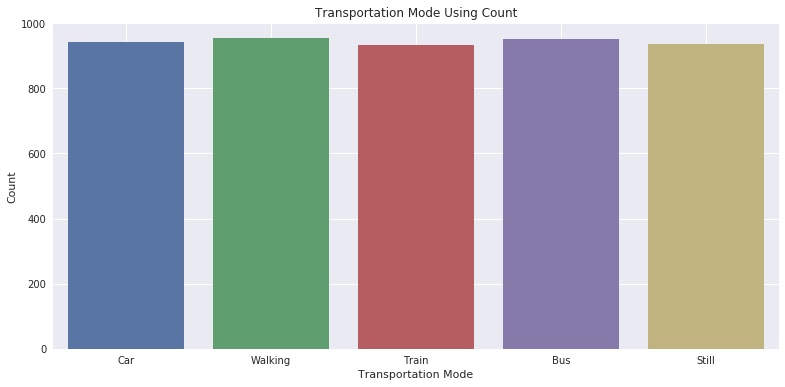

In [4]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "target" , data = df)
plt.xlabel("Transportation Mode")
plt.ylabel("Count")
plt.title("Transportation Mode Using Count")
plt.grid(True)
plt.show(fig)

### Verificação das dimensões dos dados de treino e dos dados de teste e dos nomes dos atributos

In [5]:
print(df.shape , test.shape)

df.columns

(4714, 38) (1179, 38)


Index(['time', 'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.linear_acceleration#mean',
       'android.sensor.linear_acceleration#min',
       'android.sensor.linear_acceleration#max',
       'android.sensor.linear_acceleration#std',
       'android.sensor.orientation#mean', 'android.sensor.orientation#min',


### Verificação da dimensionalidade de alguns atributos

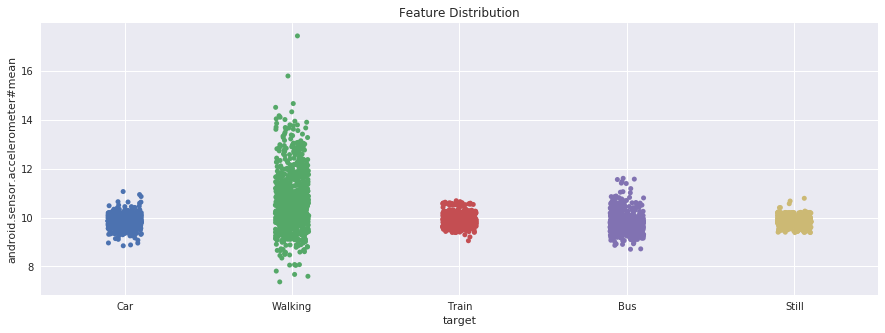

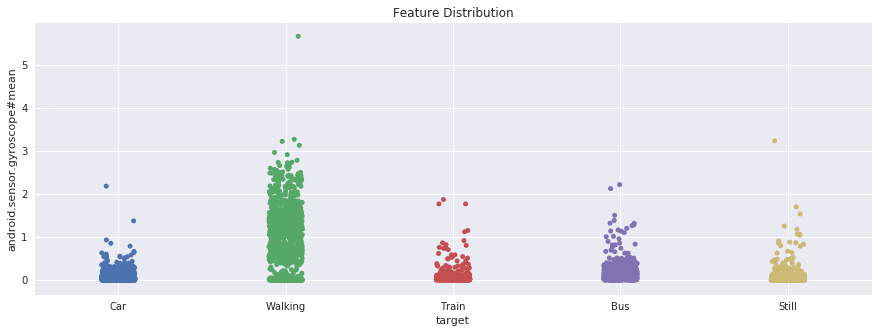

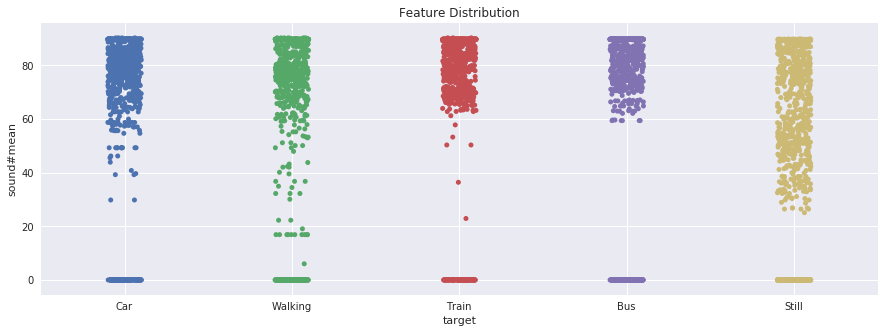

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='target', y= 'android.sensor.accelerometer#mean', data= df, jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='target', y= 'android.sensor.gyroscope#mean', data= df, jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='target', y= 'sound#mean', data= df, jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

### Redimensionamento dos atributos

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:37])
mat_train = scaler.transform(df.iloc[:,0:37])
print(mat_train)

scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:37])
mat_test = scaler.transform(test.iloc[:,0:37])
print(mat_test)

[[0.03387334 0.21784851 0.61804815 ... 0.49801019 0.49801019 0.0253911 ]
 [0.06185567 0.28956531 0.54192208 ... 0.         0.         0.        ]
 [0.09720177 0.45272192 0.5155578  ... 0.01947038 0.01947038 0.        ]
 ...
 [0.07658321 0.23031324 0.68421945 ... 0.         0.         0.        ]
 [0.01030928 0.25770798 0.80118158 ... 0.         0.         0.        ]
 [0.55375552 0.25604939 0.77225155 ... 0.         0.         0.        ]]
[[0.1464497  0.33053002 0.94231284 ... 0.         0.         0.        ]
 [0.51923077 0.37455302 0.97330651 ... 0.         0.         0.        ]
 [0.00147929 0.28878365 0.62005137 ... 0.         0.         0.        ]
 ...
 [0.02810651 0.81023559 0.22308111 ... 0.         0.         0.        ]
 [0.33284024 0.31277692 0.79563477 ... 0.06833892 0.06833892 0.09518294]
 [0.74556213 0.37676254 0.9488591  ... 0.         0.         0.        ]]


### Codificação das variáveis dependentes

In [8]:
temp = []
for i in df.target:
    if i == "Car": temp.append(0)
    if i == "Walking": temp.append(1)
    if i == "Train": temp.append(2)
    if i == "Bus": temp.append(3)
    if i == "Still": temp.append(4)
df["n_Target"] = temp

temp = []
for i in test.target:
    if i == "Car": temp.append(0)
    if i == "Walking": temp.append(1)
    if i == "Train": temp.append(2)
    if i == "Bus": temp.append(3)
    if i == "Still": temp.append(4)
test["n_Target"] = temp

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Isolando as variáveis dependentes

In [9]:
y_train = df["n_Target"]

y_test = test["n_Target"]

### Preparação dos dados para a rede neural

In [10]:
import keras
from keras.utils import to_categorical

y_train = to_categorical(df.n_Target , num_classes=5)
y_test = to_categorical(test.n_Target , num_classes=5)

X_train = mat_train
X_test = mat_test

X_test = np.expand_dims(X_test, axis=2)
X_train = np.expand_dims(X_train, axis=2)


print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

Using TensorFlow backend.


(4714, 37, 1) (4714, 5)
(1179, 37, 1) (1179, 5)


### Ajuste e validação do modelo
Modelo utilizando somente RNN.

In [11]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot

# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 15, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(LSTM(80, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy

# Resumo das pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# Rodando um experimento
def run_experiment(repeats=10):
    # repetindo um experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # Resumo dos resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

>#1: 72.604
>#2: 71.671
>#3: 70.653
>#4: 73.707
>#5: 69.211
>#6: 65.310
>#7: 68.702
>#8: 68.363
>#9: 69.635
>#10: 73.198
[72.60390155592442, 71.67090761449198, 70.65309578832476, 73.70653093821726, 69.2111958731424, 65.30958433794308, 68.70229010666903, 68.36301948783557, 69.63528416943409, 73.19762508579996]
Accuracy: 70.305% (+/-2.453)


## Modelo Combinando CNN com LSTM

In [12]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras import regularizers
from matplotlib import pyplot

# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 80, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(2,2,activation='relu',input_shape=(37, 1)))
    model.add(Conv1D(filters=96, kernel_size=5, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=96, kernel_size=5, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(80))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy

# Resumo das pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# Rodando um experimento
def run_experiment(repeats=10):
    # repetindo um experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # Resumo dos resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

>#1: 78.032
>#2: 79.559
>#3: 84.733
>#4: 78.880
>#5: 85.666
>#6: 88.380
>#7: 80.068
>#8: 70.823
>#9: 84.309
>#10: 84.054
[78.03223066859775, 79.55894822584966, 84.73282447803618, 78.88040708929326, 85.66581854080123, 88.37998308702683, 80.06785412882222, 70.82273115840779, 84.30873619691106, 84.05428329092452]
Accuracy: 81.450% (+/-4.777)
